do something...
我想搜搜看最後的N天內各種商品售出情形(訂單完成)

In [1]:
#import matplotlib.pyplot as plt
#plt.rcParams["font.family"] = ["sans-serif"]
#plt.rcParams['font.sans-serif']=['Microsoft YaHei', 'Bitstream Vera Sans', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif'] #用来正常显示中文标签
#plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import gc
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['simhei'] 


In [1]:
df = pd.read_csv('../../Orders.csv')

D:\andyl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#day = int(input('要找最近幾天內的?'))
day = 30

In [4]:
# Convert date string to machine-friendly string.
df['DateIdRaw'] = pd.to_datetime(df['DateId'].astype(str), format='%Y%m%d')

In [5]:
# Sort data by date 
df.sort_values(by='DateIdRaw', inplace=True)

In [6]:
# Reset index by new order (??? 
df['Index'] = range(0, df.shape[0]) 
df.set_index('Index', inplace=True) # HINT: df.set_index is not an in-place operation.

In [7]:
day_start = df.loc[df.shape[0]-1, 'DateIdRaw'] - pd.DateOffset(day - 1) # get start date
day_start

Timestamp('2018-03-17 00:00:00')

In [9]:
# get our target ...
target = df[(df['DateIdRaw'] >= day_start)] 

In [13]:
# Get count of each purchase record by city
byCol = 'City'
data = target.groupby(by=byCol)[byCol].count()
data

City
1st        2
南投縣     2048
台中市    22718
台北市    18102
台南市    11924
台東市       18
台東縣      987
嘉義市     1380
嘉義縣     1969
基隆市     2438
宜蘭縣     2057
屏東市       13
屏東縣     3475
彰化縣     6046
新北市    32881
新竹市     4163
新竹縣     4109
桃園市    16602
桃園縣        2
澎湖縣      636
花蓮縣     1812
苗栗縣     3190
雲林縣     2350
高雄市    16820
Name: City, dtype: int64

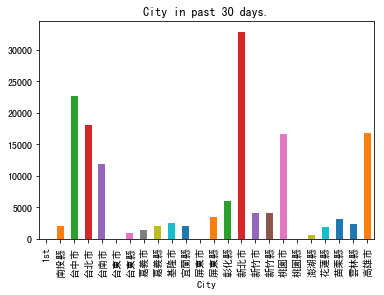

['1st',
 '南投縣',
 '台中市',
 '台北市',
 '台南市',
 '台東市',
 '台東縣',
 '嘉義市',
 '嘉義縣',
 '基隆市',
 '宜蘭縣',
 '屏東市',
 '屏東縣',
 '彰化縣',
 '新北市',
 '新竹市',
 '新竹縣',
 '桃園市',
 '桃園縣',
 '澎湖縣',
 '花蓮縣',
 '苗栗縣',
 '雲林縣',
 '高雄市']

In [17]:
ax = data.plot(kind='bar', title=byCol + ' in past %d days.'%(day))
ax.ylabel='人次'
plt.show()
list(data.index)